# Pravin Prakashrao Kulkarni

https://github.com/pravink83/AIML-Supervised.git

# Thera Bank Personal Loan Campaign

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [62]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

<ul style='font-size: 20px;'><li>Read data and print first 5 rows</li></ul>

In [63]:
bankData = pd.read_csv('Bank_Personal_Loan_MOdelling.csv')
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<ul style='font-size: 20px;'><li>Verify DataTypes</li></ul>

In [64]:
bankData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

<ul style='font-size: 20px;'><li>Statistical Summary</li></ul>

In [65]:
# Remove ID and Zip Code columns as those does not make sense to include in statistical summary
validCols = np.array(bankData.columns)
validCols = np.delete(validCols, [0,4])
validCols

array(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'], dtype=object)

In [66]:
# Statistical Summary

bankData[validCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<ul style='font-size: 20px;'><li>Incorrect Imputation</li></ul>

In [67]:
# From the statistical summary it can be seen that Experience got min value as negative.
# Veify how many records has negative Experience

bankData[bankData['Experience'] < 0]['Experience'].count()

52

In [68]:
# As the Experience cannot be a negative value, it make sense to replace any negative values with 0. 

for indx, rw in bankData.iterrows():
    if rw['Experience'] < 0:
        bankData.at[indx, 'Experience'] = 0

# Reverify for any negatives after replacement

bankData[bankData['Experience'] < 0]['Experience'].count()

0

In [69]:
# Now, as the Experience values have been changed, Re-print the Statistical Summary.

bankData[validCols].describe().T

# Imputation of negative values by 0 in Experience did not adversely affect the statistical summary except the min value.

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<ul style='font-size: 20px;'><li>Shape of Data</li></ul>

In [70]:
bankData.shape

(5000, 14)

<ul style='font-size: 20px;'><li>Verify if any nulls or NaN</li></ul>

In [71]:
# Verify if any nulls

bankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [72]:
# Verify if any NaN

bankData.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

<ul style='font-size: 20px;'><li>Number of unique in each column</li></ul>

In [73]:
bankData.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<ul style='font-size: 20px;'><li>Number of people with zero mortgage</li></ul>

In [74]:
bankData[bankData['Mortgage'] == 0]['ID'].count()

3462

<ul style='font-size: 20px;'><li>Number of people with zero credit card spending per month</li></ul>

In [75]:
bankData[bankData['CCAvg'] == 0]['ID'].count()

106

<ul style='font-size: 20px;'><li>Value counts of all categorical columns</li></ul>

In [76]:
catCols = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in catCols:
    print('--- Using', '"size"' ' Function ---')
    print()
    print(bankData.groupby(by=col)[col].size())
    print()
    print('--- Using', '"value_counts"' ' Function ---')
    print()
    print(bankData.groupby(by=col)[col].value_counts()) #-- Gives same result as of size function. size() result looks better.
    print()

--- Using "size" Function ---

Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

--- Using "value_counts" Function ---

Family  Family
1       1         1472
2       2         1296
3       3         1010
4       4         1222
Name: Family, dtype: int64

--- Using "size" Function ---

Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

--- Using "value_counts" Function ---

Education  Education
1          1            2096
2          2            1403
3          3            1501
Name: Education, dtype: int64

--- Using "size" Function ---

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

--- Using "value_counts" Function ---

Personal Loan  Personal Loan
0              0                4520
1              1                 480
Name: Personal Loan, dtype: int64

--- Using "size" Function ---

Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

--- Using "value_counts" Function ---

Securities Acc

<ul style='font-size: 20px;'><li>Univariate and Bivariate</li></ul>

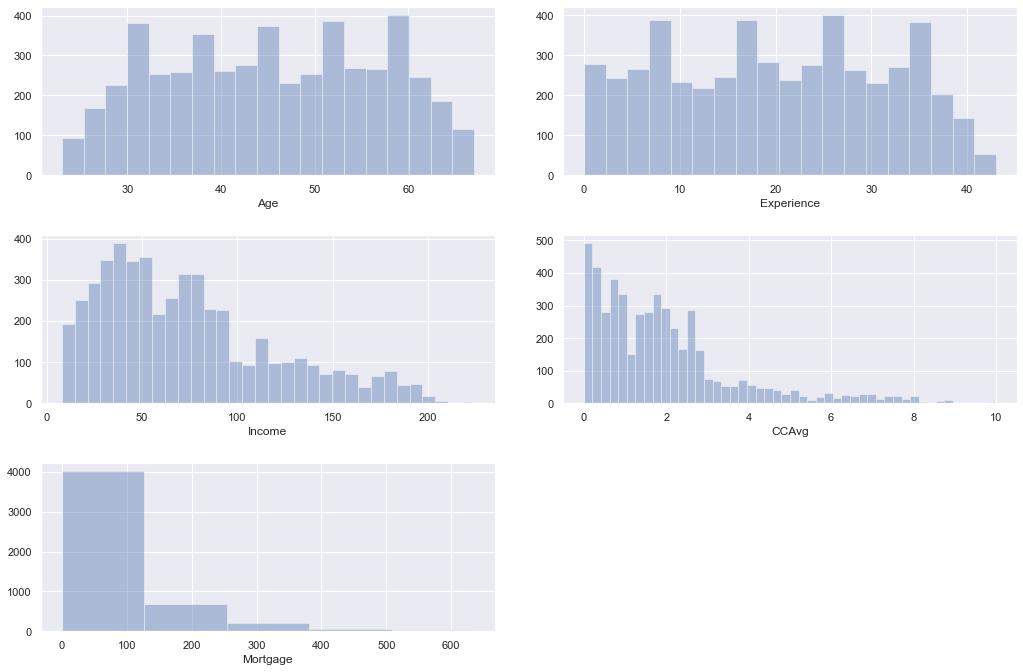

In [77]:
# Univariate - DISTPLOT

figure, axes = plt.subplots(3, 2, figsize=(15,10))
figure.tight_layout(pad=3.0)

sns.distplot(bankData['Age'], ax=axes[0,0], kde=False)
sns.distplot(bankData['Experience'],ax=axes[0,1], kde=False)
sns.distplot(bankData['Income'],ax=axes[1,0], kde=False)
sns.distplot(bankData['CCAvg'], ax=axes[1,1], kde=False)
sns.distplot(bankData['Mortgage'], ax=axes[2, 0], kde=False, bins=5);
axes[2 ,1].set_visible(False);

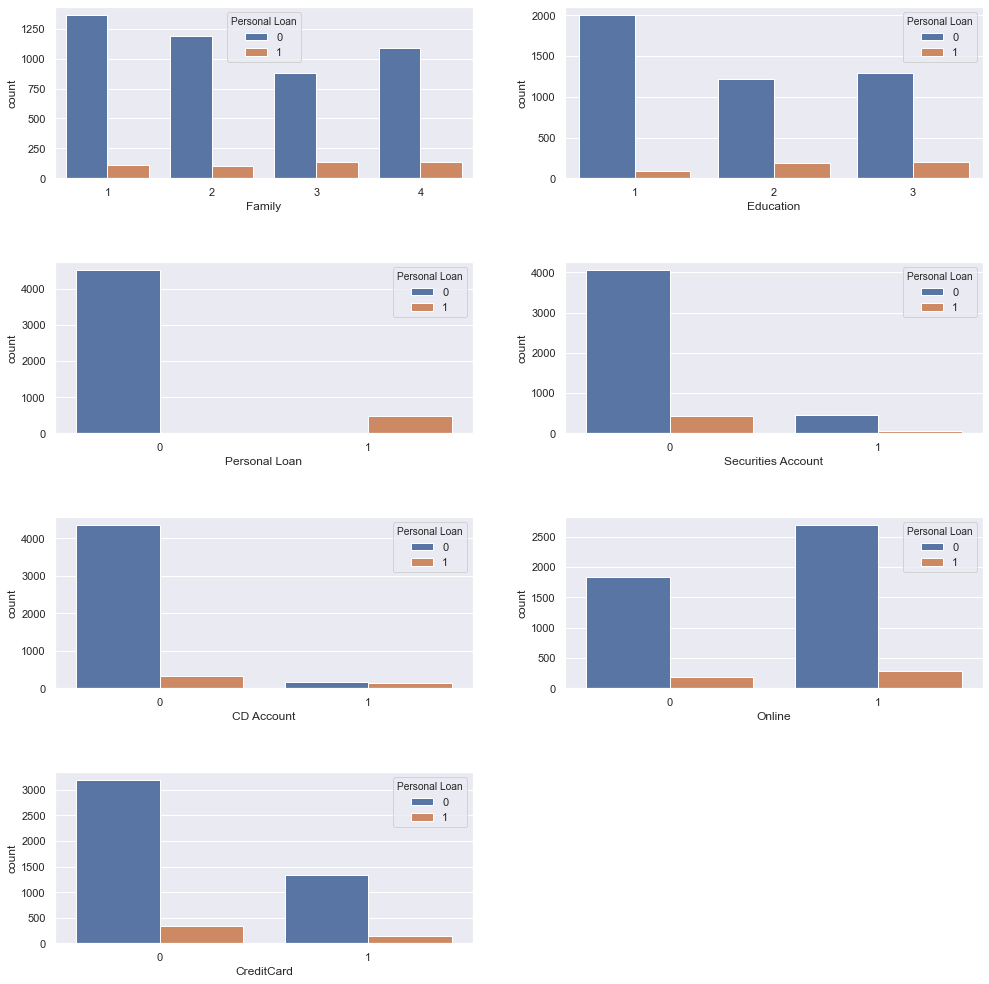

In [78]:
# Univariate - COUNTPLOT
figure, axes = plt.subplots(4, 2, figsize=(15,15))
figure.tight_layout(pad=5.0)

sns.countplot(data=bankData, x='Family', hue='Personal Loan', ax=axes[0,0]);
sns.countplot(data=bankData, x='Education', hue='Personal Loan', ax=axes[0,1]);
sns.countplot(data=bankData, x='Personal Loan', hue='Personal Loan', ax=axes[1,0]);
sns.countplot(data=bankData, x='Securities Account', hue='Personal Loan', ax=axes[1,1]);
sns.countplot(data=bankData, x='CD Account', hue='Personal Loan', ax=axes[2,0]);
sns.countplot(data=bankData, x='Online', hue='Personal Loan', ax=axes[2,1]);
sns.countplot(data=bankData, x='CreditCard', hue='Personal Loan', ax=axes[3,0]);
axes[3 ,1].set_visible(False)

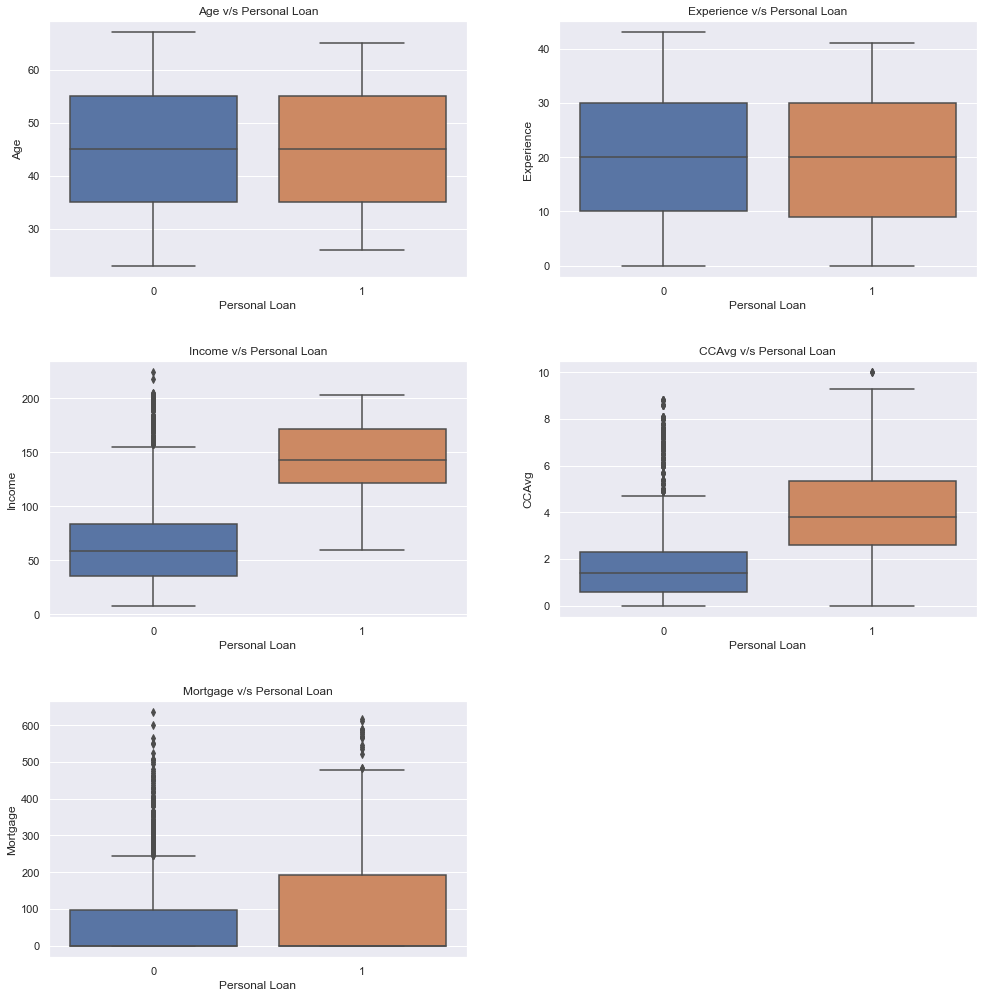

In [79]:
# Bivariate - BoxPlot
# Comparing call columns with 'Personal Loan' because it is our target column
# Numerical vs Numerical columns

figure, axes = plt.subplots(3, 2, figsize=(15,15))
figure.tight_layout(pad=5.0)

sns.boxplot(bankData['Personal Loan'], bankData['Age'], ax=axes[0,0]).set_title('Age v/s Personal Loan');
sns.boxplot(bankData['Personal Loan'], bankData['Experience'], ax=axes[0,1]).set_title('Experience v/s Personal Loan');
sns.boxplot(bankData['Personal Loan'], bankData['Income'], ax=axes[1,0]).set_title('Income v/s Personal Loan');
sns.boxplot(bankData['Personal Loan'], bankData['CCAvg'], ax=axes[1,1]).set_title('CCAvg v/s Personal Loan');
sns.boxplot(bankData['Personal Loan'], bankData['Mortgage'], ax=axes[2,0]).set_title('Mortgage v/s Personal Loan');
axes[2 ,1].set_visible(False);

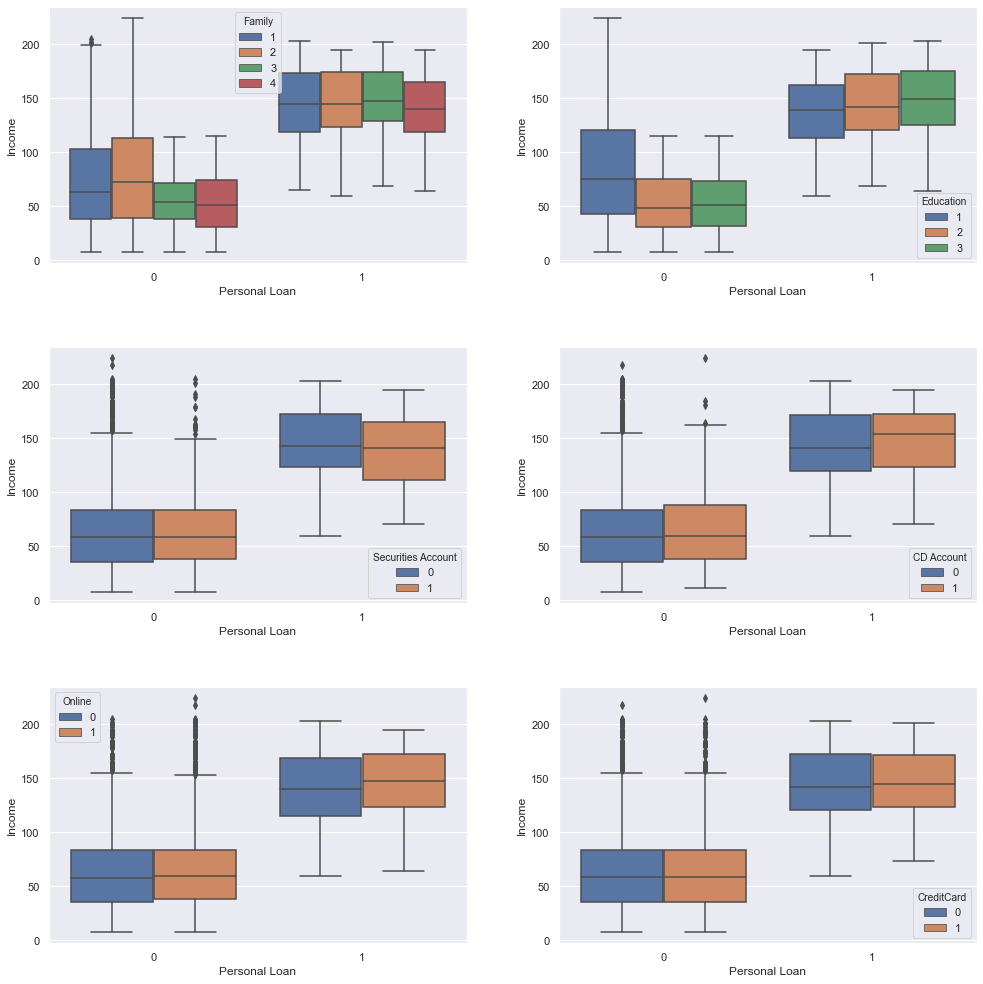

In [80]:
# Bivariate - BoxPlot
# Comparing call columns with 'Personal Loan' because it is our target column
# Numerical vs Categorical columns (as Hue) with Help of Income column (which is causing Quasi-Complete separation)

figure, axes = plt.subplots(3, 2, figsize=(15,15))
figure.tight_layout(pad=5.0)

sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='Family', ax=axes[0,0]);
sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='Education', ax=axes[0,1]);
sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='Securities Account', ax=axes[1,0]);
sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='CD Account', ax=axes[1,1]);
sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='Online', ax=axes[2,0]);
sns.boxplot(data=bankData, x='Personal Loan', y='Income', hue='CreditCard', ax=axes[2,1]);

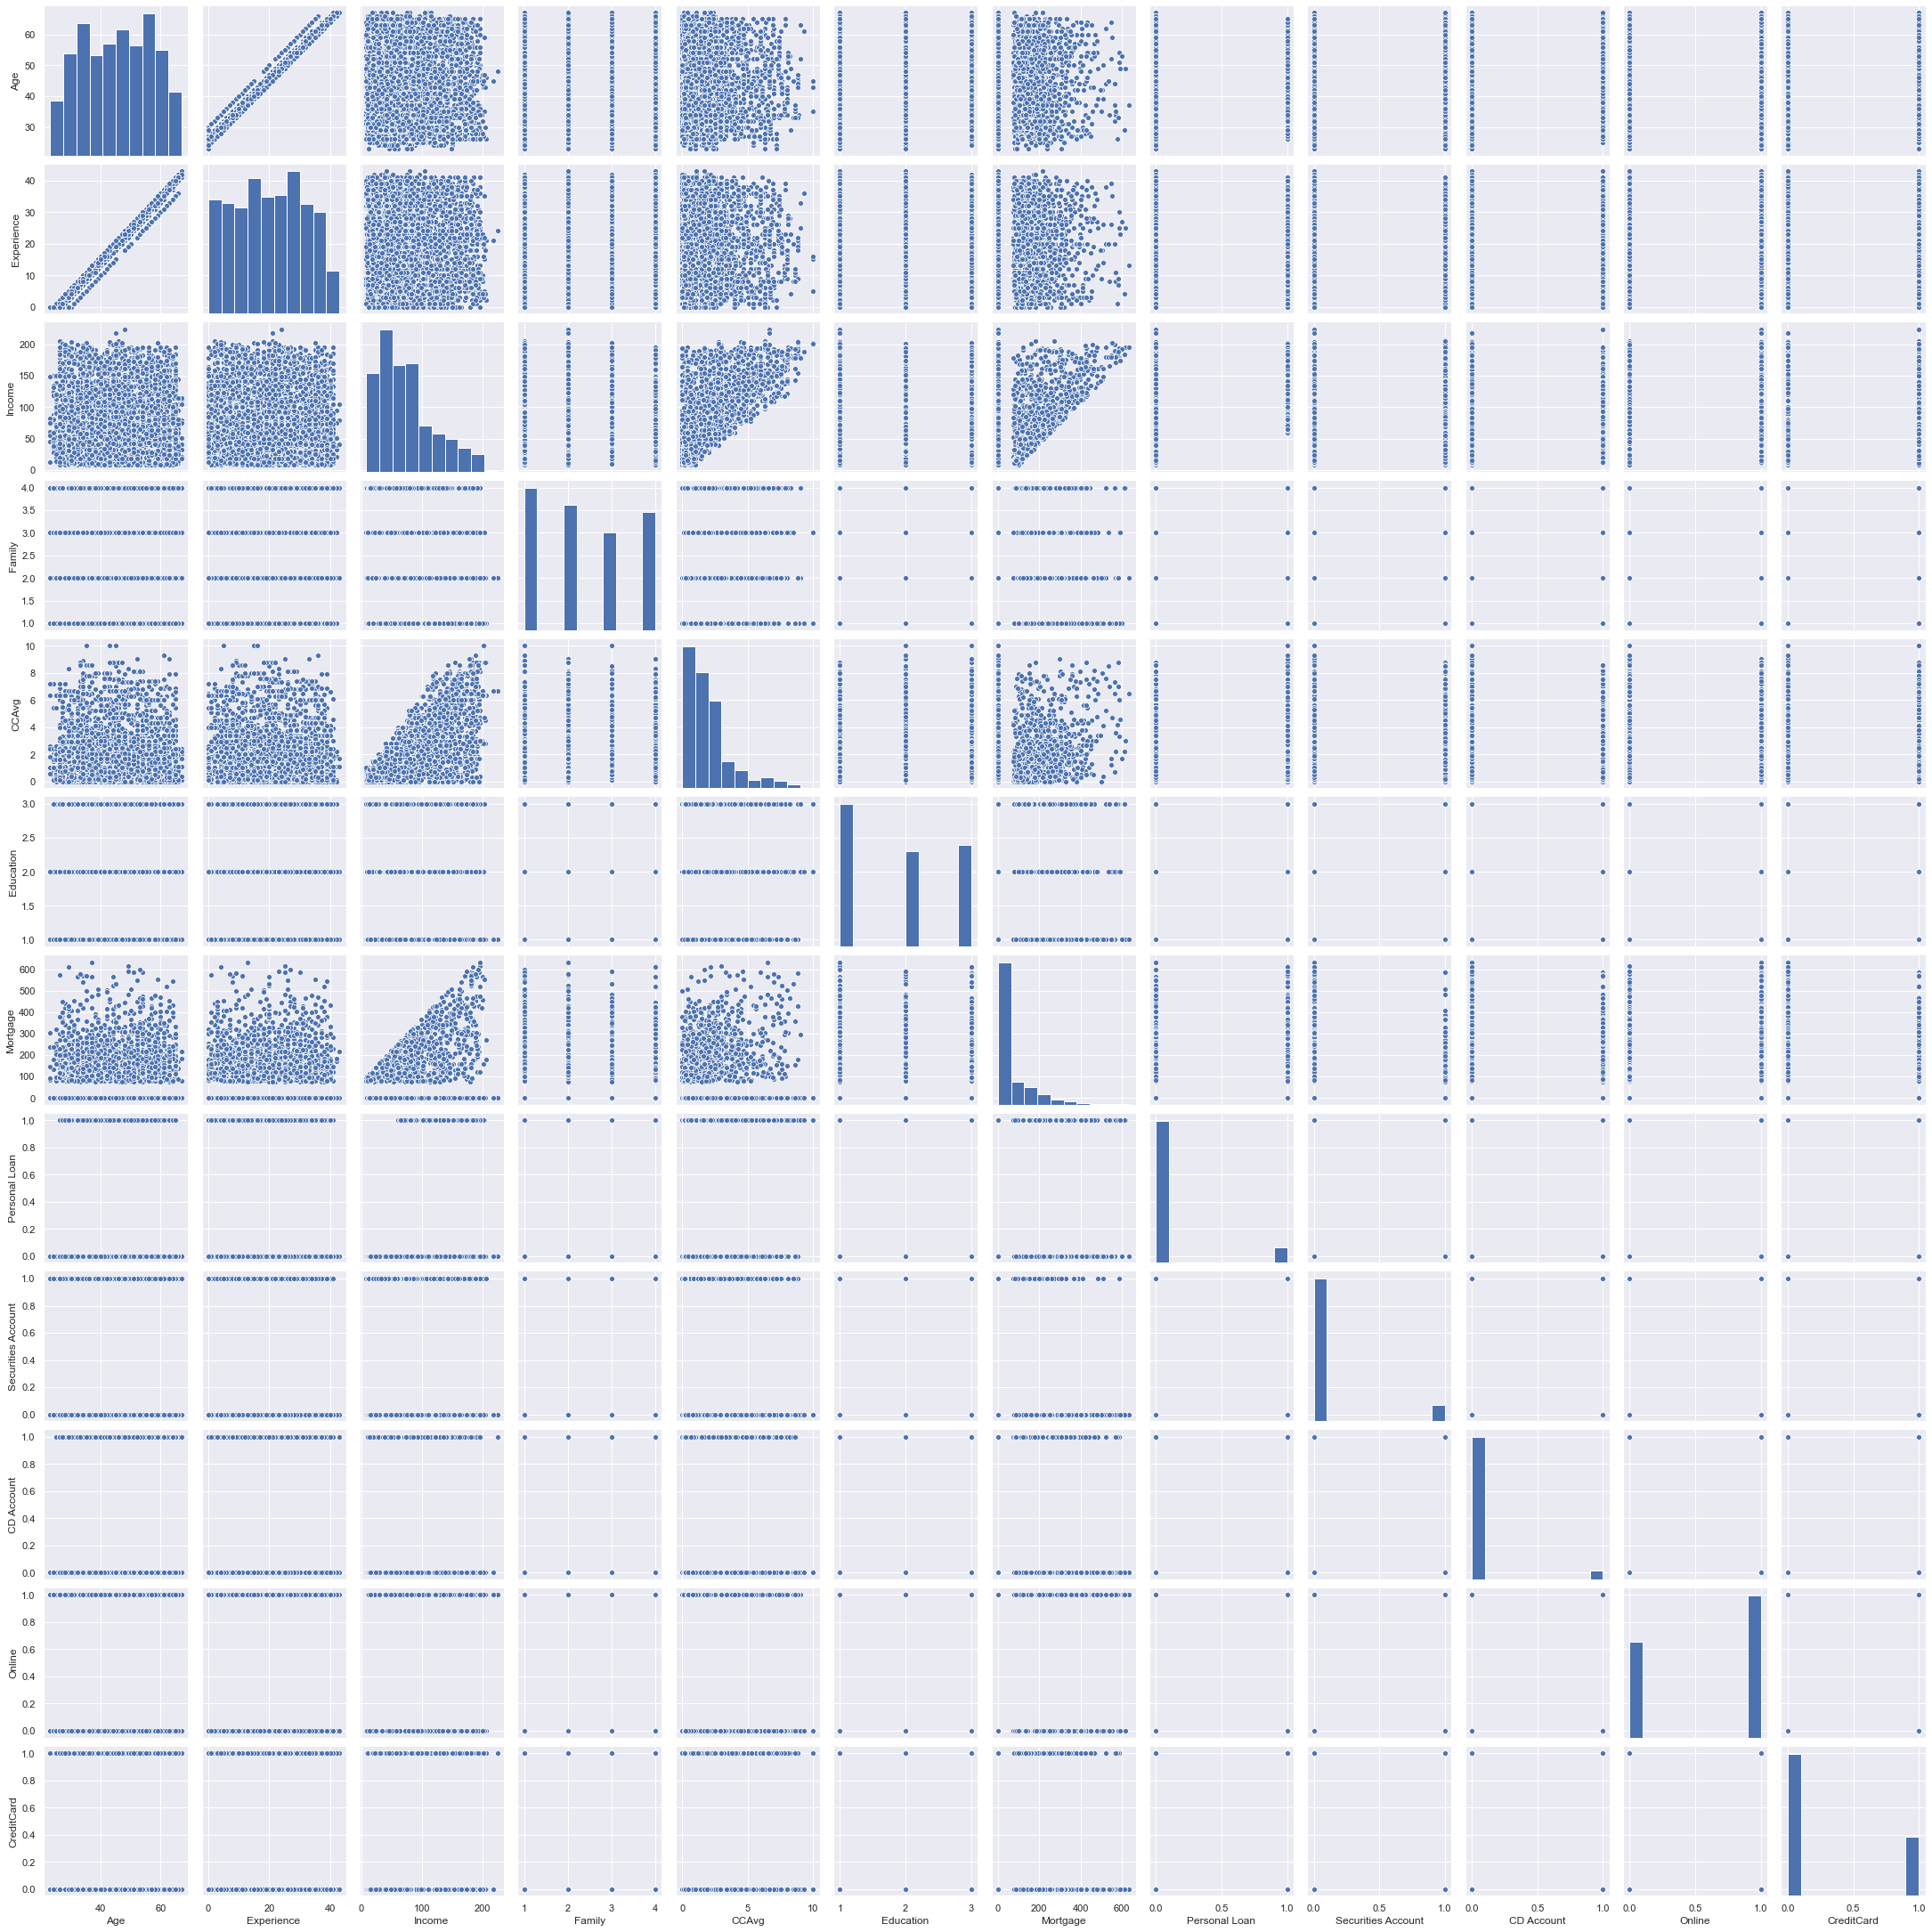

In [81]:
# Multivariate analysis

# Pair Plot

sns.pairplot(bankData, vars=validCols);

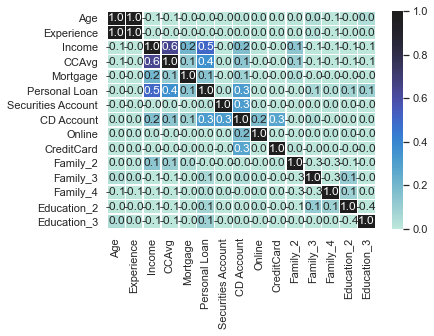

In [82]:
# Multivariate analysis

# Heatmap

sns.heatmap(pd.get_dummies(bankData[validCols], columns=['Family', 'Education'], drop_first=True).corr(), 
            annot=True, linewidths=.5, fmt= '.1f', center = 1, vmin=0, vmax=1);

<ul style='font-size: 20px;'><li>Get data model ready</li></ul>

In [83]:
# Not considering other categorical columns for dummies because they have only 2 unique values.
print("Categorical Columns: ", catCols)

bankDataWithDummies = pd.get_dummies(bankData[validCols], columns=['Family', 'Education'], drop_first=True)
bankDataWithDummies.head()

Categorical Columns:  ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0


In [84]:
# Create datasets for X and Y variables.

X = bankDataWithDummies.drop(columns=['Personal Loan'])
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,0,1,1,0


In [85]:
Y = bankDataWithDummies[['Personal Loan']].reset_index().drop(columns=['index'])
Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [86]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [87]:
# Verify the split

print("Total Rows in Train Data: ", len(X_Train), '   ', len(X_Train)/len(X)*100, ' %')
print("Total Rows in Test Data: ", len(X_Test), '   ', len(X_Test)/len(X)*100, ' %')

print()

print("Original Set Personal Loan True Values: ",
      len(bankDataWithDummies[bankDataWithDummies['Personal Loan'] == 1]),'  ',
len(bankDataWithDummies[bankDataWithDummies['Personal Loan'] == 1]) / len(bankDataWithDummies) * 100, ' %')

print("Original Set Personal Loan False Values: ",
      len(bankDataWithDummies[bankDataWithDummies['Personal Loan'] == 0]),'  ',
len(bankDataWithDummies[bankDataWithDummies['Personal Loan'] == 0]) / len(bankDataWithDummies) * 100, ' %')

print()

print("Training Set Personal Loan True Values: ",
      len(Y_Train[Y_Train['Personal Loan'] == 1]),'  ',
len(Y_Train[Y_Train['Personal Loan'] == 1]) / len(Y_Train) * 100, ' %')

print("Training Set Personal Loan False Values: ",
      len(Y_Train[Y_Train['Personal Loan'] == 0]),'  ',
len(Y_Train[Y_Train['Personal Loan'] == 0]) / len(Y_Train) * 100, ' %')

print()

print("Test Set Personal Loan True Values: ",
      len(Y_Test[Y_Test['Personal Loan'] == 1]),'  ',
len(Y_Test[Y_Test['Personal Loan'] == 1]) / len(Y_Test) * 100, ' %')

print("Test Set Personal Loan False Values: ",
      len(Y_Test[Y_Test['Personal Loan'] == 0]),'  ',
len(Y_Test[Y_Test['Personal Loan'] == 0]) / len(Y_Test) * 100, ' %')

Total Rows in Train Data:  3500     70.0  %
Total Rows in Test Data:  1500     30.0  %

Original Set Personal Loan True Values:  480    9.6  %
Original Set Personal Loan False Values:  4520    90.4  %

Training Set Personal Loan True Values:  331    9.457142857142857  %
Training Set Personal Loan False Values:  3169    90.54285714285714  %

Test Set Personal Loan True Values:  149    9.933333333333334  %
Test Set Personal Loan False Values:  1351    90.06666666666666  %


### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [88]:
# Build the Logistic Regression model

logit = sm.Logit(Y_Train, sm.add_constant(X_Train))
lg = logit.fit()

#Summary of logistic regression
lg.summary()

Optimization terminated successfully.
         Current function value: 0.107508
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6565
Time:                        15:02:22   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.933e-299
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1804      2.228     -5.916      0.000     -17.547      -8.814
Age                   -0.0093      0.082     -0.114      0.910      -0.169       0.151
Experience             0.0145      0.082      0.178      0.859      -0.145       0.174
Income                 0.0627      0.004     16.308      0.000       0.055       0.070
CCAvg                  0.2466      0.058      4.242      0.000       0.133       0.361
Mortgage               0.0009      0.001      1.224      0.221      -0.001       0.002
Securities Account    -1.0702      0.405     -2.640      0.008      -1.865      -0.276
CD Account             3.7084      0.437      8.481      0.000       2.851       4.565
Online                -0.5856      0.206     -2.843      0.004      -0.989      -0.182
CreditCard            -0.9986      0.270     -3.703      0.000      -1.527      -0.470
Family_2               0.0311      0.291      0.107      0.915      -0.540       0.602
Family_3               2.4884      0.315      7.893      0.000       1.871       3.106
Family_4               1.6417      0.310      5.292      0.000       1.034       2.250
Education_2            4.0058      0.347     11.546      0.000       3.326       4.686
Education_3            4.2729      0.347     12.302      0.000       3.592       4.954
======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [89]:
# Calculate Odds Ratio, Probability and P-Value of coefficients

lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['Odds Ratio'] = np.exp(lgcoef['coef']) # Odds Ratio = Exponential of Coefficient.
lgcoef['Probability'] = lgcoef['Odds Ratio'] / (1+ lgcoef['Odds Ratio'])
lgcoef['P-Value'] = lg.pvalues
lgcoef

,coef,Odds Ratio,Probability,P-Value
const,-13.180427,0.000002,0.000002,3.299545e-09
Age,-0.009264,0.990779,0.497684,9.095692e-01
Experience,0.014513,1.014619,0.503628,8.586894e-01
Income,0.062727,1.064737,0.515677,8.687996e-60
CCAvg,0.246615,1.279687,0.561343,2.212881e-05
Mortgage,0.000919,1.000919,0.500230,2.208200e-01
Securities Account,-1.070173,0.342949,0.255370,8.302333e-03
CD Account,3.708357,40.786721,0.976069,2.224326e-17
Online,-0.585626,0.556757,0.357639,4.473672e-03
CreditCard,-0.998598,0.368396,0.269217,2.132799e-04


In [90]:
# Create Model

logRegModel = LogisticRegression()
logRegModel.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
# Build the predictions

Y_Predict = logRegModel.predict(X_Test)

True Negatives :  1339
False Positives :  12
False Negatives :  62
True Positives :  87


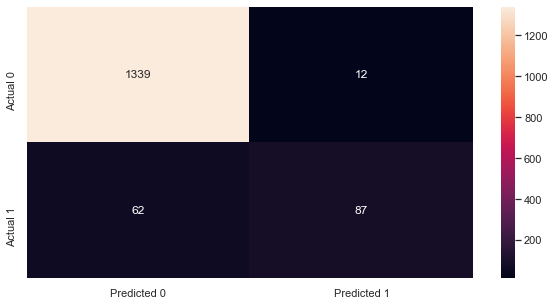

In [92]:
# Confuction Matrix

cm = confusion_matrix(Y_Test, Y_Predict)

tn, fp, fn, tp = confusion_matrix(Y_Test, Y_Predict).ravel()

print("True Negatives : ", tn)
print("False Positives : ", fp)
print("False Negatives : ", fn)
print("True Positives : ", tp)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='', xticklabels = ['Predicted 0','Predicted 1'] , yticklabels = ['Actual 0','Actual 1']);

In [93]:
# Accuracy

print("Accuracy as calculated using confusion matix ", (tp+tn)/(tp+fp+tn+fn))
print()
print("Training Set Mean Accuracy ", logRegModel.score(X_Train, Y_Train))
print()
print("Test Set Mean Accuracy ", logRegModel.score(X_Test, Y_Test))
print()
print("Test Set Accuracy classification score ", accuracy_score(Y_Test, Y_Predict))

Accuracy as calculated using confusion matix  0.9506666666666667

Training Set Mean Accuracy  0.962

Test Set Mean Accuracy  0.9506666666666667

Test Set Accuracy classification score  0.9506666666666667


In [94]:
# Recall

print('Recall ', recall_score(Y_Test, Y_Predict))

Recall  0.5838926174496645


In [95]:
# Precision

print('Precision ', precision_score(Y_Test, Y_Predict))

Precision  0.8787878787878788


In [96]:
# F1 Score

print('F1 Score', f1_score(Y_Test, Y_Predict))

F1 Score 0.7016129032258064


In [97]:
# ROC AUC 

print("ROC AUC", roc_auc_score(Y_Test, Y_Predict))

ROC AUC 0.7875051540246101


False Positive Rate  [0.         0.00888231 1.        ]
True Positive Rate  [0.         0.58389262 1.        ]
Thresholds  [2 1 0]


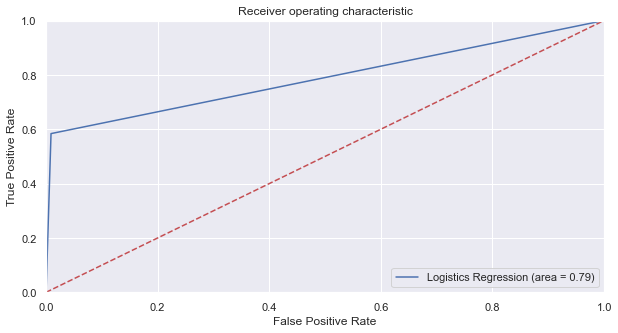

In [98]:
# ROC AUC graph

roc_auc = roc_auc_score(Y_Test, Y_Predict)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(Y_Test, Y_Predict)

print("False Positive Rate ", falsePositiveRate)
print("True Positive Rate ", truePositiveRate)
print("Thresholds ", thresholds)

plt.figure(figsize=(10,5))
plt.plot(falsePositiveRate, truePositiveRate, label='Logistics Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

### 5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

In [99]:
logRegModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
# Try finding best combination of parameters by running through all parameters. 
# Here, the C and Random State parameters can have more than 4 values, however, to keep loop low, considering only 4.

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet', 'none']
classWeights = ['balanced', 'None']
multiClasses = ['auto', 'ovr', 'multinomial']
Cs = range(25, 125, 25)
randomStates = range(25, 125, 25)
# Lets analyze the Logistic Regression with various different parameters

resultsFrame = pd.DataFrame(columns=['random_state', 'C', 'penalty', 'solver', 'class_weight', 'multi_class',
                                     'Training Set Score', 'Test Set Score',
                                     'ROC AUC Score', 'True Positive', 'False Positive', 'True Negative', 'False Negative'])

# Below is heavy loop running 1920 iterations, so have some patience

#counter = 0
for s in solvers:
    for p in penalties:
        for c in Cs:
            c = c/100
            for r in randomStates:
                for clw in classWeights:
                    for mlc in multiClasses:
                        # During exeuction it is found that solver, penalty and other parameters sometimes needs to be a 
                        # sepecific combination, so using try except to continue finding the best combination.
                    
                        try:
                            if(clw=='None'):
                                newLogRegModel = LogisticRegression(random_state=r, C=c, penalty=p, solver=s, multi_class=mlc) 
                            else:
                                newLogRegModel = LogisticRegression(random_state=r, C=c, penalty=p, solver=s, class_weight=clw, multi_class=mlc)
                        
                            #counter += 1
                            #print(counter)
                            
                            newLogRegModel.fit(X_Train, Y_Train)
                            Y_Predict = newLogRegModel.predict(X_Test)
                            trainingScore = newLogRegModel.score(X_Train, Y_Train)
                            testScore = newLogRegModel.score(X_Test, Y_Test)
                            tn, fp, fn, tp = confusion_matrix(Y_Test, Y_Predict).ravel()
                            rocAuc = roc_auc_score(Y_Test, Y_Predict)
                            resultsFrame = resultsFrame.append(pd.Series([r, c, p, s, clw, mlc, trainingScore, testScore,
                                                                          rocAuc, tp, fp, tn, fn], 
                                                                         index=resultsFrame.columns), ignore_index=True)
                        except:
                            pass

In [101]:
# Print all parameters having maximum ROC AUC Score.

maxRocAuc = resultsFrame['ROC AUC Score'].max()
resultsFrame[resultsFrame['ROC AUC Score'] == maxRocAuc]

,random_state,C,penalty,solver,class_weight,multi_class,Training Set Score,Test Set Score,ROC AUC Score,True Positive,False Positive,True Negative,False Negative
290,25,0.25,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
296,50,0.25,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
302,75,0.25,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
308,100,0.25,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
314,25,0.50,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
320,50,0.50,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
326,75,0.50,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
332,100,0.50,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
338,25,0.75,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18
344,50,0.75,none,lbfgs,balanced,multinomial,0.911429,0.911333,0.897036,131,115,1236,18


False Positive Rate  [0.         0.08512213 1.        ]
True Positive Rate  [0.         0.87919463 1.        ]
Thresholds  [2 1 0]


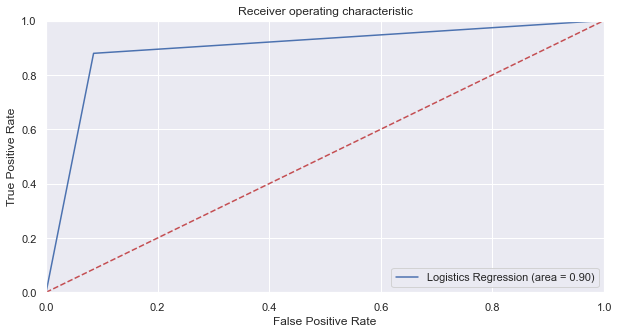

In [102]:
# Lets see how Roc Curve looks like for any combination of the parameters above

bestLogRegModel = LogisticRegression(random_state=75, C=0.50, solver='lbfgs', 
                                     penalty='none',class_weight='balanced', multi_class='multinomial')
bestLogRegModel.fit(X_Train, Y_Train)
Y_Predict = bestLogRegModel.predict(X_Test)

roc_auc = roc_auc_score(Y_Test, Y_Predict)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(Y_Test, Y_Predict)

print("False Positive Rate ", falsePositiveRate)
print("True Positive Rate ", truePositiveRate)
print("Thresholds ", thresholds)

plt.figure(figsize=(10,5))
plt.plot(falsePositiveRate, truePositiveRate, label='Logistics Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

<ul><li>Thus, the model will perform better with any of the above set of parameters.</li><ul>

### 6. Give Business understanding of your model? (5 marks)

<ul><li>True Positives - Predicted = Observed = 1</li>
    Customer will convert to be a Personal Loan Customer, so bank should spend marketing expenses on such customers.
    
<li>False Positives - Predicted = 1, Observed = 0</li>
    Customer will not convert as Personal Loan Customer, so bank will loose money when marketing for such customers.
    
<li>True Negative - Predicted = Observed = 0</li>
    Customer will not convert as Personal Loan Customer, so bank should not target these customers and save money.
    
<li>False Negatives - Predicted = 0, Observed = 1</li>
    Customer might have converted as Personal Loan Customer, however, bank will not target these customers based on model results, so bank will loose this opportunity on these customers.
</ul>